In [43]:
import pandas as pd
import json
from arcgis.gis import GIS
from IPython.display import display

In [44]:
gis = GIS("http://slustl.maps.arcgis.com/home", "emmaleeblackwood")

Enter password: ········


In [45]:
from arcgis.geoenrichment import *
from arcgis.features import enrich_data

In [46]:
desert_url = 'https://services2.arcgis.com/bB9Y1bGKerz1PTl5/arcgis/rest/services/_FoodDesert_geojson/FeatureServer'
vacancy_url = 'https://services2.arcgis.com/bB9Y1bGKerz1PTl5/arcgis/rest/services/_vacancy_low_geojson/FeatureServer'

<Item title:"./FoodDesert.geojson" type:Feature Layer Collection owner:emmaleeblackwood>
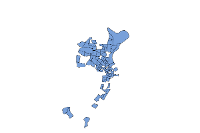

<Item title:"./FoodDesert.geojson" type:GeoJson owner:emmaleeblackwood>

In [47]:
desert_search = gis.content.search('FoodDesert')
for x in desert_search:
    display(x)

In [50]:
desert_item = desert_search[0]
desert_layer = desert_item.layers[0]

In [51]:
desert_enrich = enrich_data.enrich_layer(desert_layer)

In [70]:
map3 = gis.map('St. Louis, MO')
map3

MapView(layout=Layout(height='400px', width='100%'))

In [72]:
map3.add_layer(desert_enrich, 
               {"renderer":"ClassedColorRenderer",
               "field_name":'TOTPOP',
               "opacity":0.7}
              )

In [ ]:
webmap_item_properties = {'title':'Food Desert Populations',
                         'snippet':'Map created using Python API showing the total population in each food desert',
                         'tags':['stl', 'food desert', 'python']}

map3.save(webmap_item_properties)

## Hot spot map

In [80]:
from arcgis.features import analysis

In [75]:
join_features = gis.content.get('305a1bb160594941a2461c71dbcc3c0b')

<Item title:"Join_Features_to_Food_Deserts_STL" type:Feature Layer Collection owner:emmaleeblackwood>
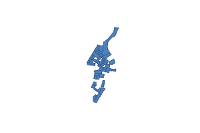

In [76]:
join_features

In [77]:
join_lyr = join_features.layers

In [79]:
map2 = gis.map('St. Louis, MO')
map2

MapView(layout=Layout(height='400px', width='100%'))

In [82]:
hot_spots = analysis.find_hot_spots(join_features, analysis_field='Join_Count', divided_by_field=None, bounding_polygon_layer=None, aggregation_polygon_layer=None, output_name=None, context=None, gis=None)

In [83]:
map2.add_layer(hot_spots['hot_spots_result_layer'])

In [ ]:
webmap_item_properties = {'title':'Vacant Lot Hot Spots in Food Deserts',
                         'snippet':'Map created using Python API showing hot spots of vacant lots in food deserts',
                         'tags':['stl', 'food desert', 'python']}

map2.save(webmap_item_properties)

## School Map

In [104]:
from arcgis.features import use_proximity

In [97]:
school_data = './school.zip'

In [98]:
school_properties = {'title': 'STL Public Schools', 'tags': 'stl, school', 'type': 'Shapefile'}
school_lyr = gis.content.add(school_properties, school_data)
published_schools  = school_lyr.publish()

In [99]:
published_schools

<Item title:"STL Public Schools" type:Feature Layer Collection owner:emmaleeblackwood>

In [106]:
school_layer = published_schools.layers[0]

In [113]:
map4 = gis.map('St. Louis')
map4

MapView(layout=Layout(height='400px', width='100%'))

In [114]:
map4.add_layer(school_layer)

In [111]:
school_buffer = use_proximity.create_buffers(school_layer, distances=[0.25], units = 'Miles')

In [115]:
map4.add_layer(school_buffer)

<Item title:"Summarize_STL_Vacancy___Low_Estimate_within_hexagon_bins" type:Feature Layer Collection owner:gregbrunner_slugis>
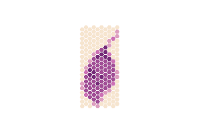

<Item title:"./vacancy-low.geojson" type:Feature Layer Collection owner:emmaleeblackwood>
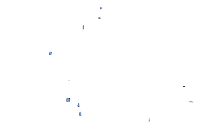

<Item title:"Low-Estimate STL Vacancy" type:Web Map owner:emmaleeblackwood>
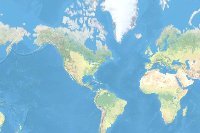

<Item title:"STL Vacancy - Low Estimate" type:File Geodatabase owner:gregbrunner_slugis>
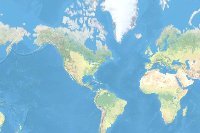

<Item title:"STL Vacancy - Low Estimate" type:Feature Layer Collection owner:gregbrunner_slugis>
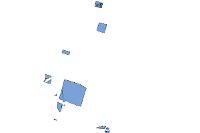

<Item title:"./vacancy-low.geojson" type:GeoJson owner:emmaleeblackwood>

In [85]:
vacancy_search = gis.content.search('vacancy-low')
for x in vacancy_search:
    display(x)

In [116]:
vacancy = gis.content.get('da3b9641a62d49509e3232fe1902e429')

<Item title:"./vacancy-low.geojson" type:Feature Layer Collection owner:emmaleeblackwood>
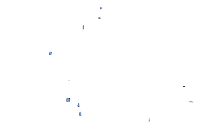

In [117]:
vacancy

In [118]:
vac_lyr = vacancy.layers

In [119]:
map4.add_layer(vac_lyr)